### **Simple Linear Regression - Machine Learning using Python**

This notebook demonstrates a comprehensive workflow for performing and evaluating Simple Linear Regression using Python and `scikit-learn`.

### Steps for Performing Linear Regression

1. **Import Required Libraries**  
   Import all necessary Python libraries for data manipulation, visualization, and modeling.

2. **Load and Explore Training Data**  
   Load the dataset, display its contents, and explore basic statistics.

3. **Visualize Training Data**  
   Create a scatter plot to visualize the relationship between features and target.

4. **Split Data into Training and Testing Sets**  
   Use `train_test_split` to divide the data for unbiased model evaluation.

5. **Initialize and Train Linear Regression Model**  
   Instantiate and fit a linear regression model to the training data.

6. **Make Predictions on Test Set**  
   Use the trained model to predict target values for the test set.

7. **Evaluate Model Performance (R² Score)**  
   Assess the model's goodness-of-fit using the R² score.

8. **Calculate Key Statistical Metrics (MAE, MSE, RMSE)**  
   Compute Mean Absolute Error, Mean Squared Error, and Root Mean Squared Error.

9. **Manual Prediction Calculation**  
   Demonstrate manual calculation of predictions using the learned coefficients.

10. **Predict for Array of Values**  
    Use the model to predict on a new set of input values.

11. **Add Predictions to Testing Data**  
    Add the predicted values as a new column to the DataFrame.

12. **Save Predictions to CSV**  
    Save the DataFrame with predictions to a CSV file.

13. **Plot Model Predictions**  
    Visualize the regression line along with the original data.

### Import Required Libraries

Import `pandas`, `numpy`, `matplotlib`, and scikit-learn's `linear_model`, `model_selection`, and `metrics` modules. Set up matplotlib for inline plotting and suppress specific warnings.

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import linear_model, metrics
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore", message="X does not have valid feature names*")

### Load and Explore Training Data

Load the training data from a CSV file using pandas, display the DataFrame, and show basic statistics.

In [16]:
# Load the dataset
df = pd.read_csv("house_prices_inr.csv")
df.head()

,Area,Price_INR
0,750,3194193
1,800,2502586
2,850,3969622
3,900,3588555
4,950,4021949


In [17]:
# Display basic statistics
df.describe()

,Area,Price_INR
count,60.00000,6.000000e+01
mean,2225.00000,1.071367e+07
std,873.21246,6.872745e+06
min,750.00000,2.502586e+06
25%,1487.50000,5.778317e+06
50%,2225.00000,9.109538e+06
75%,2962.50000,1.409777e+07
max,3700.00000,3.938714e+07


### Visualize Training Data

Create a scatter plot of area vs. price using matplotlib to visualize the training data.

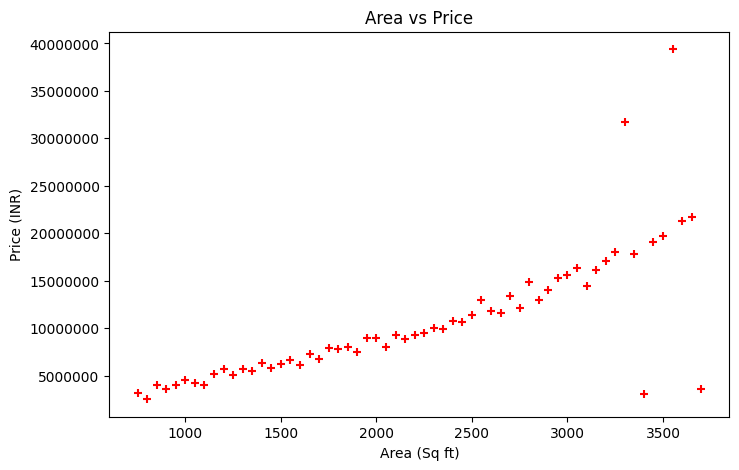

In [19]:
plt.figure(figsize=(8,5))

plt.xlabel('Area (Sq ft)')
plt.ylabel('Price (INR)')
# Disable scientific notation on y-axis
plt.ticklabel_format(style='plain', axis='y') 
plt.scatter(df['Area'], df['Price_INR'], color='red', marker='+')
plt.title('Area vs Price')
plt.show()

## Split Data into Training and Testing Sets

Use `train_test_split` from `sklearn.model_selection` to split the data into training and testing sets (e.g., 80/20 split).

In [20]:
# Define features and target
X = df[['Area']]
y = df['Price_INR']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 48
Test set size: 12


### Initialize and Train Linear Regression Model

Initialize a `LinearRegression` model from `scikit-learn` and `fit` it to the training data.

In [21]:
# Initialize the model
model = linear_model.LinearRegression()

# Fit the model
model.fit(X_train, y_train)

LinearRegression()

### Make Predictions on Test Set

Use the trained model to predict prices for the test set.

In [22]:
# Predict on the test set
y_pred = model.predict(X_test)
y_pred

array([ 1832400.74174528,  3309912.33691751, 12470484.22698537,
       15130005.09829539,  5673930.88919309, 17789525.96960541,
       11583977.26988203, 16016512.05539872,  5378428.57015864,
       18676032.92670875, 15425507.41732983, 16607516.69346762])

### Evaluate Model Performance (R² Score)

Use the model's `score()` method to calculate the R² score on the test set.

In [23]:
# R² score
r2 = model.score(X_test, y_test)
print(f"R² score on test set: {r2:.4f}")

R² score on test set: 0.9624


### Calculate Key Statistical Metrics (MAE, MSE, RMSE)

Use `sklearn.metrics` to calculate Mean Absolute Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE) for the test predictions.

In [24]:
mae = metrics.mean_absolute_error(y_test, y_pred)
mse = metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

Mean Absolute Error (MAE): 952250.86
Mean Squared Error (MSE): 1343124400840.18
Root Mean Squared Error (RMSE): 1158932.44


These error metrics give a good sense of how a regression model is performing: 

* MAE (~₹9.5 lakh) means on average your predictions are off by about 9.5 lakh rupees.

* MSE (~1.34 trillion) is the average squared error, penalizing bigger errors more heavily.

* RMSE (~₹11.6 lakh) is the square root of MSE, in the original price units, and also tells you typical prediction error magnitude.

**The errors are pretty high but expected given the variance and outliers in a dataset.**

Outliers usually inflate MSE and RMSE a lot, so if you want better predictions on "normal" data, you might want to:

* Try removing or treating outliers

* Use robust regression methods

* Log-transform the target variable (Price_INR) to stabilize variance

### Manual Prediction Calculation

Manually calculate the predicted price using the linear equation and compare it to the model's prediction.

In [25]:
area = 2500
m = model.coef_[0]
b = model.intercept_
y_manual = m * area + b

print(f"Manual calculation for area {area}: {y_manual:.2f}")
print(f"Model prediction for area {area}: {model.predict([[area]])[0]:.2f}")

Manual calculation for area 2500: 12174981.91
Model prediction for area 2500: 12174981.91


### Predict for Array of Values

Use the trained model to predict prices for an array of area values loaded from a separate CSV file (new_areas.csv).

In [26]:
# Load new areas for prediction
new_areas = pd.read_csv("new_areas.csv")
new_areas.head()

,Area
0,780
1,1125
2,1380
3,1650
4,1830


In [27]:
# Predict prices for these areas
predicted_prices = model.predict(new_areas)
predicted_prices

array([ 2009702.13316595,  4048668.13450363,  5555729.96157931,
        7151442.48436532,  8215250.83288933,  9810963.35567534,
       11288474.95084758, 12765986.54601981, 14243498.14119205,
       15721009.73636428, 17198521.33153651, 18676032.92670875,
       20153544.52188098, 21631056.11705322, 23108567.71222545])

### Add Predictions to Testing Data

Add the predicted prices as a new column to the testing DataFrame.

In [28]:
new_areas['Predicted Prices'] = predicted_prices
new_areas.head()

,Area,Predicted Prices
0,780,2.009702e+06
1,1125,4.048668e+06
2,1380,5.555730e+06
3,1650,7.151442e+06
4,1830,8.215251e+06


### Save Predictions to CSV

Save the testing DataFrame with predictions to a CSV file. (predicted_house_prices.csv)

In [29]:
new_areas.to_csv('predicted_house_prices.csv', index=False)
print("Predictions saved to 'predicted_house_prices.csv'")

Predictions saved to 'predicted_house_prices.csv'


### Plot Model Predictions

Plot the regression line along with the original training data to visualize the model's fit.

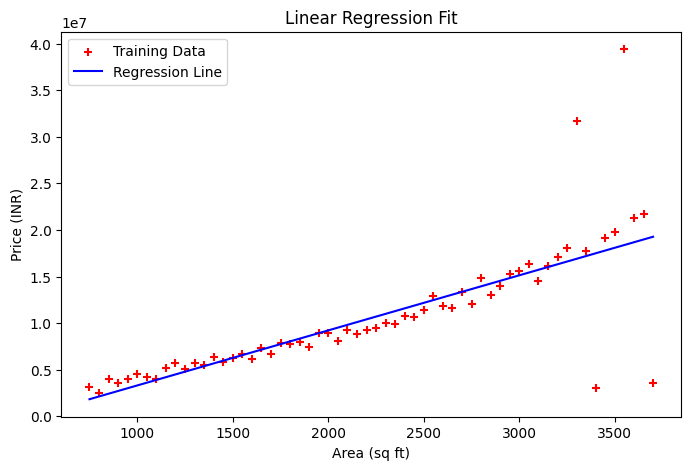

In [30]:
plt.figure(figsize=(8,5))
plt.xlabel('Area (sq ft)')
plt.ylabel('Price (INR)')
plt.scatter(df['Area'], df['Price_INR'], color='red', marker='+', label='Training Data')
plt.plot(df['Area'], model.predict(df[['Area']]), color='blue', label='Regression Line')
plt.legend()
plt.title('Linear Regression Fit')
plt.show()

### **Exercise: Simple Linear Regression**

#### Problem Statement

You are given a dataset `exam_scores.csv` containing the number of study hours and corresponding exam scores for 50 students. Your task is to build a **Simple Linear Regression** model to predict the exam score based on the number of study hours.

You should:
- Load and explore the data
- Visualize the data
- Split the data into training and testing sets
- Train a simple linear regression model
- Evaluate the model using R², MAE, MSE, and RMSE
- Visualize the regression line
- Predict the exam score for a student who studied 8 hours

---

* Download dataset : [exam_scores.csv](https://raw.githubusercontent.com/prakash-ukhalkar/ML/refs/heads/main/01_Simple%20Linear%20Regression_ML/Exercise_SLR/exam_scores.csv) 
* Solution : [Exercise - Simple Linear Regression](https://github.com/prakash-ukhalkar/ML/blob/main/01_Simple%20Linear%20Regression_ML/Exercise_SLR/01_Exercise_Linear_Regression_ML.ipynb)